# Kaggle1_StudyGroup competition

Objective: predict total sales for every product and store in the next month.
Dataset: time-series consisting of daily sales data, provided by one of the largest Russian software firms - 1C Company. 

<b>Submission File</b>

For each id in the test set, you must predict a total number of sales. The file should contain a header and have the following format:

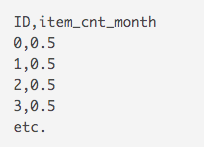

<b>File descriptions </b>

sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.<br />
test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.<br />
sample_submission.csv - a sample submission file in the correct format.<br />
x items.csv - supplemental information about the items/products.<br />
x item_categories.csv  - supplemental information about the items categories.<br />
x shops.csv- supplemental information about the shops.<br />

<b>Data fields</b>

ID - an Id that represents a (Shop, Item) tuple within the test set  <br />
shop_id - unique identifier of a shop  <br />
item_id - unique identifier of a product<br />
item_category_id - unique identifier of item category<br />
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure<br />
item_price - current price of an item<br />
date - date in format dd/mm/yyyy<br />
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33<br />
item_name - name of item<br />
shop_name - name of shop<br />
item_category_name - name of item category<br />

In [164]:
import kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
data1 = pd.read_csv('competitive-data-science-predict-future-sales/items.csv')
data2 = pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')
data3 = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv.gz')
sample1 = pd.read_csv('competitive-data-science-predict-future-sales/sample_submission.csv.gz')
data5 = pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
data6 = pd.read_csv('competitive-data-science-predict-future-sales/test.csv.gz')

In [80]:
items = data1
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [81]:
category = data2
category.head()


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [82]:
sales_train = data3
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [190]:
shops = data5
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [191]:
test = data6
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [192]:
sample1.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [193]:
shops.size

120

In [159]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [204]:
st_groupby = sales_train.groupby('date_block_num').sum()
type(st_groupby)

pandas.core.frame.DataFrame

In [210]:
#tentativa de barplot - mas tá bem estranho esse último com tanto número, não tá assim na base


print(stx)

AttributeError: 'DataFrame' object has no attribute 'date_block_num'

In [189]:
#quantidade de dias
datas = sales_train.date
datas_u = datas.unique()
datas_u.size

1034

120

In [118]:
#juntando os items com as categorias
dataset0 = pd.merge(left=category, right=items, on="item_category_id")
dataset0.columns

item_category = dataset0[['item_category_name', 'item_name', 'item_category_id', 'item_id']]
item_category.head()

,item_category_name,item_name,item_category_id,item_id
0,PC - Гарнитуры/Наушники,PC: Гарнитура HyperX Cloud Core игровая стерео...,0,5441
1,PC - Гарнитуры/Наушники,Наушники PHILIPS SBC HC8680,0,16255
2,PC - Гарнитуры/Наушники,Наушники RITMIX RH-120,0,16256
3,PC - Гарнитуры/Наушники,Наушники RITMIX RH-124 Black,0,16257
4,Аксессуары - PS2,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,1,5606
